# GUIDES FOR MACHINE LEARNING 

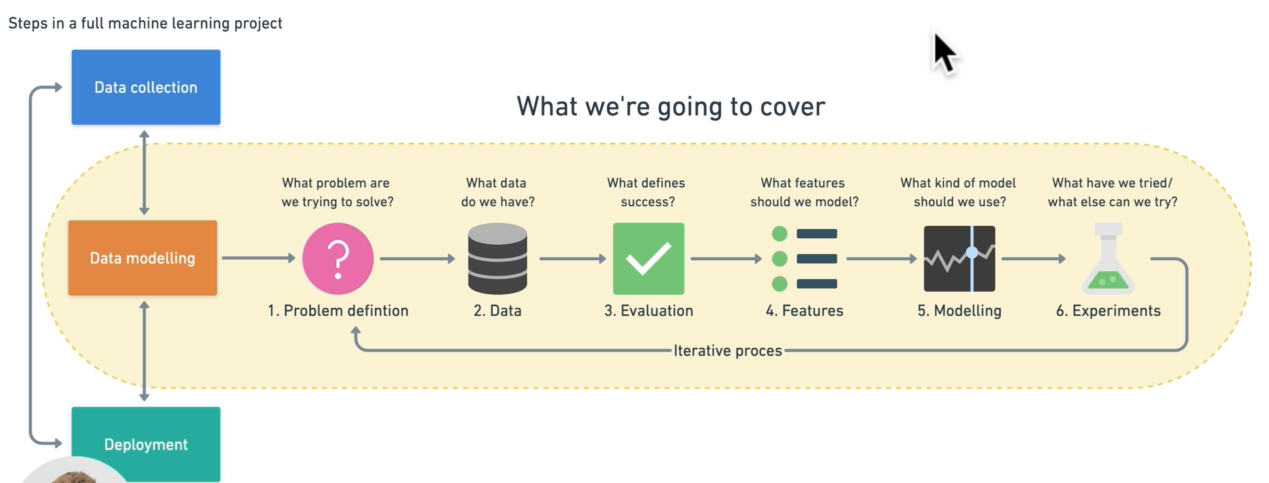

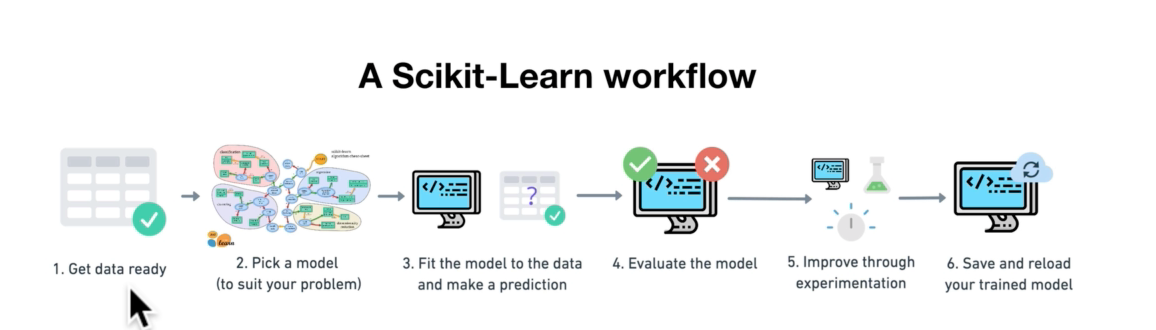

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
car_sales_df = pd.read_csv("./data/car-sales-extended.csv")
car_sales_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [5]:
car_sales_df.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [8]:
# Split Data into X/y
X = car_sales_df.drop("Price", axis=1)
y = car_sales_df["Price"]

In [14]:
# split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Building Machine Learning Model. This models uses Strings 
# but machine learning does not deal with string except number
# Hence will produce Error
from sklearn.ensemble import RandomForestRegressor
model  =  RandomForestRegressor()
# model.fit(X_train, y_train)

### Preprocessing the Strings or words into numbers 

In [18]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
# Doors feature is a categorical feature as there are different
# cars with different number of doors making categorical
car_sales_df["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [22]:
# Categories to be transformed or encoded.

categorical_features = ["Make", "Colour", "Doors"]

In [23]:
# encoding the categories passthrough means leave others as they are 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")


In [28]:
# Transformed X and view its data 
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0


## OneHot Encoding Explained with Image.

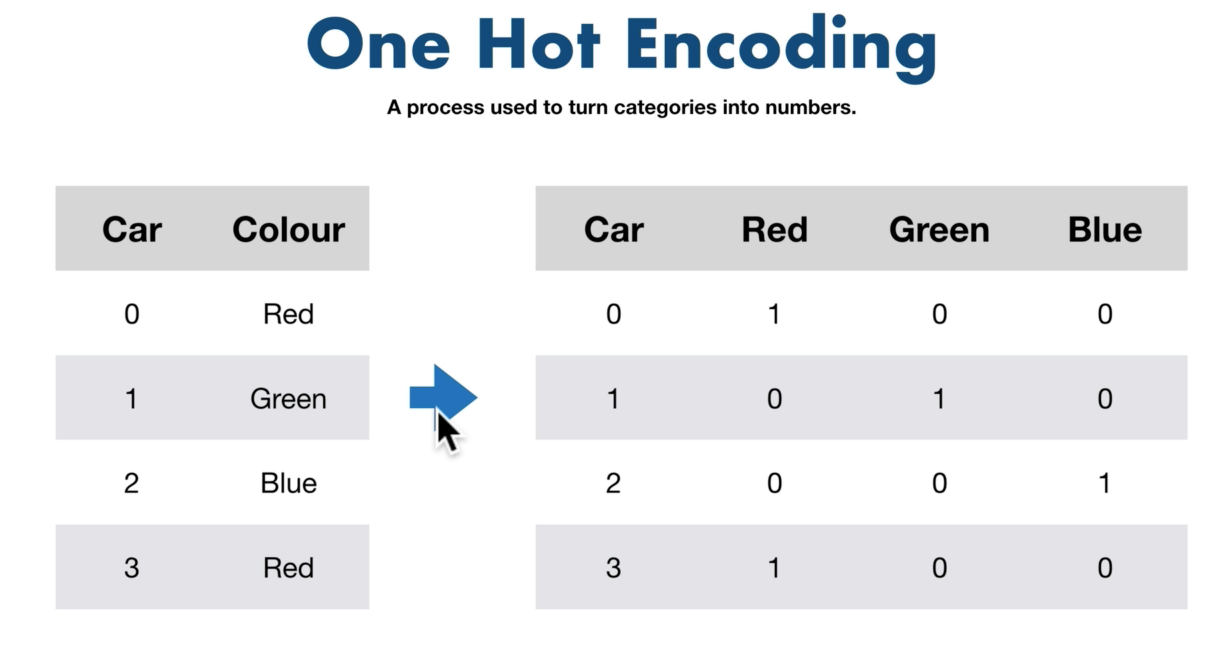

## Method II: Encoding with Pandas 

In [29]:
dummies = pd.get_dummies(car_sales_df[categorical_features])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# Lets refit the model, NOTE: y is already in numbers hence why not encoded

np.random.seed(42) # makes results reproducible 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.29444524256551574